In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
df = pd.read_excel("dados_credito.xlsx")
df.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [13]:
df.shape

(10476, 17)

*Tratamento dos Dados*

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [15]:
#CODIGO_CLIENTE não é uma varivavel que irá contribuir com o modelo, portanto devemos exclui-la
df.drop("CODIGO_CLIENTE", axis = 1, inplace = True)

In [16]:
# A label ULTIMO_SALARIO aparece como object, deveria ser float ou int, vamos analisar
df.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [17]:
# Iremos substituir o valor "SEM DADOS" pela mediana dos salários, para não interferir no modelo e não perder as informações das outras labels dessa lonha
df.replace('SEM DADOS',np.nan, inplace = True)
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].astype(np.float64)
df.isnull().sum()

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_3684\592061250.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('SEM DADOS',np.nan, inplace = True)


UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [18]:
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].fillna((df['ULTIMO_SALARIO'].median()))
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [19]:
# Agora será feita a analise das variaveis do tipo int e float, para identificar outliers, para isso deve-se anota-las em uma lista
variaveis_numericas = []
for i in df.columns.tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


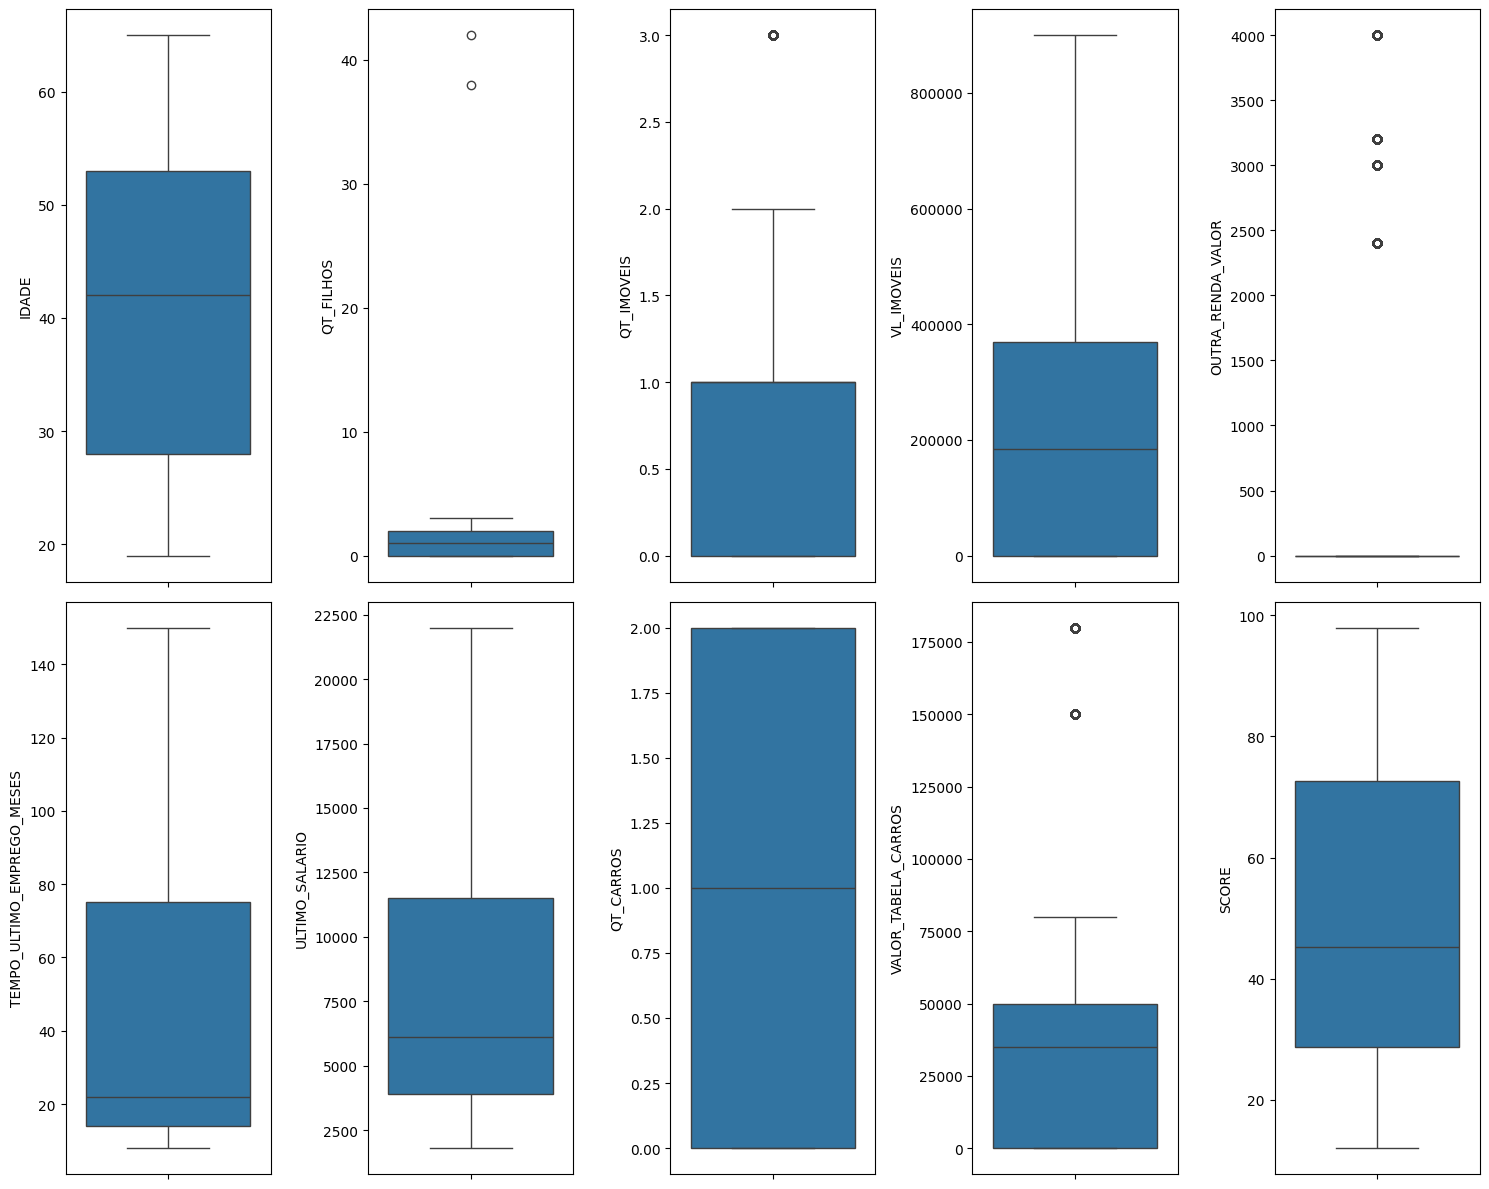

In [20]:
# Criação dos boxplots das colunas int e float

plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

In [21]:
#Conclusões: existem quatro labels com outliers "VALOR_TABELA_CARROS", "QT_IMOVEIS", "QT_FILHOS" e "OUTRA_RENDA_VALOR". Delas, apenas apenas a "QT_FILHOS" não faz sentido, por serem valores muito absurdos
#Vamos verificar
df[df['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [22]:
#Por serém valores muito absurdos e poucas ocorrências dessa anomalia, iremos exclui-las
df.drop(df.loc[df['QT_FILHOS'] > 4].index, inplace=True)

In [23]:
#Não há necessidade de explorar os outliers das outras colunas pois em seus devidos boxplots, podemos verificar que são valores factiveis.

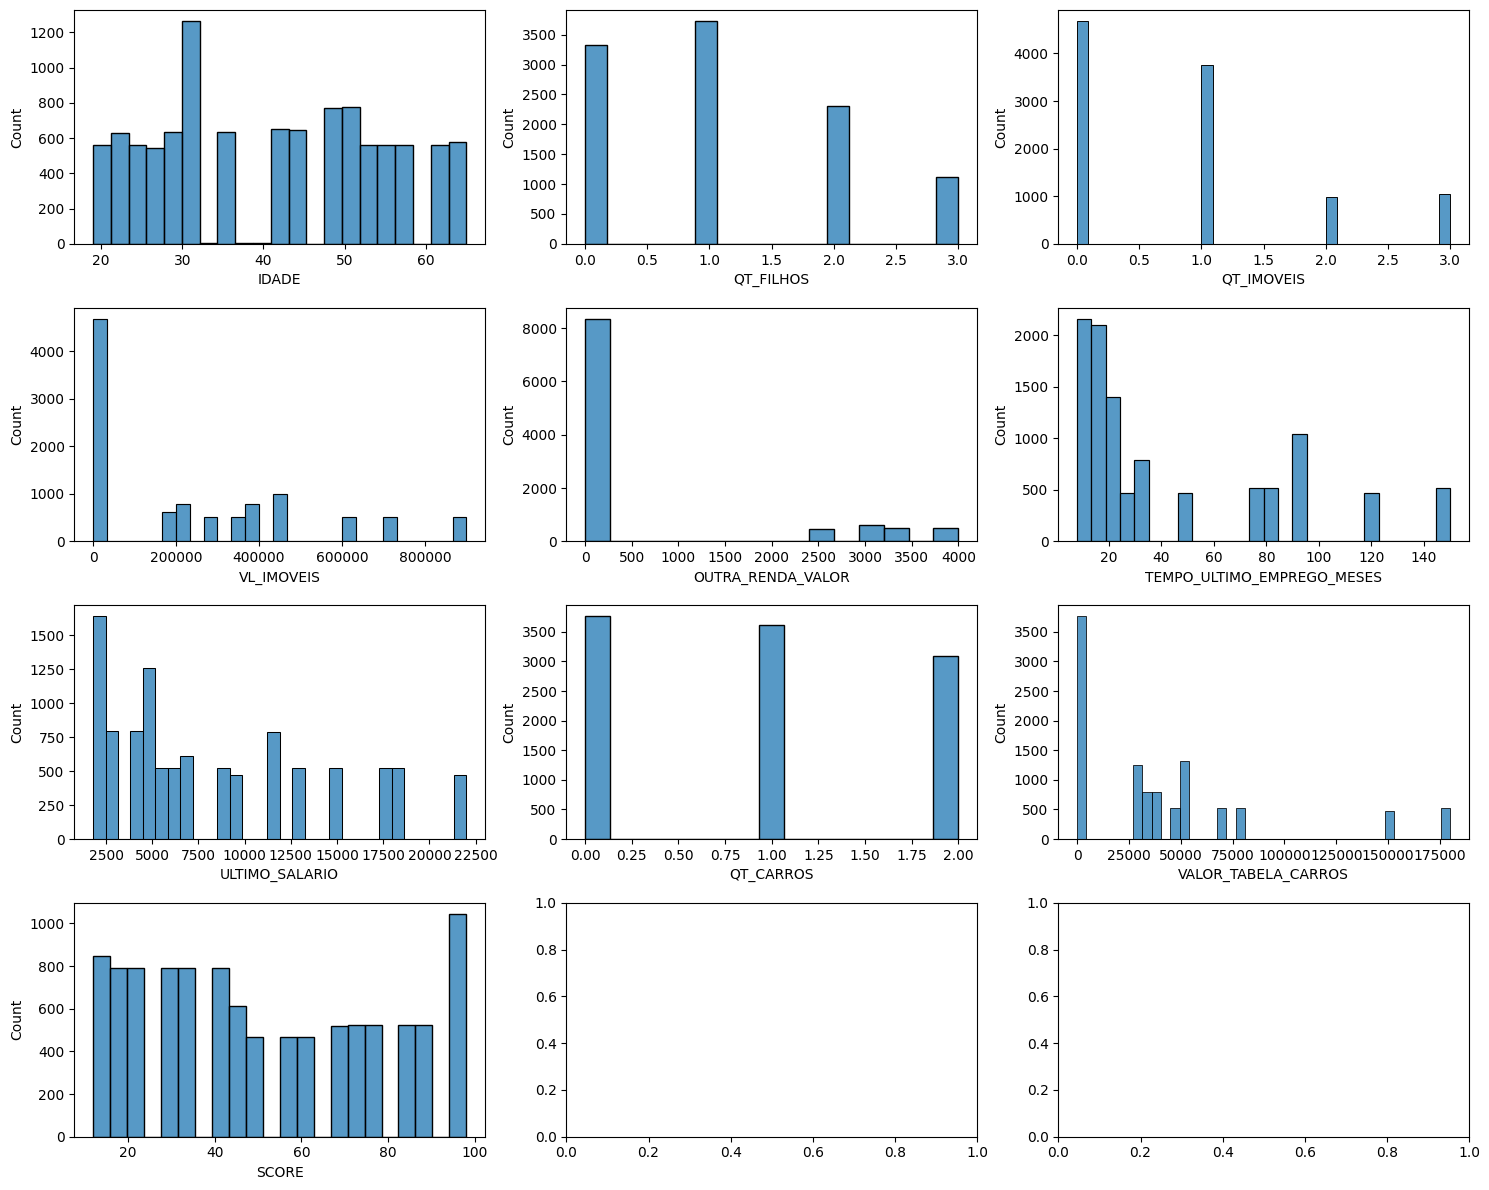

In [24]:
# Analise da distribuição dos dados via histograma
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df, x=i, ax=axes[linha][coluna])    
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

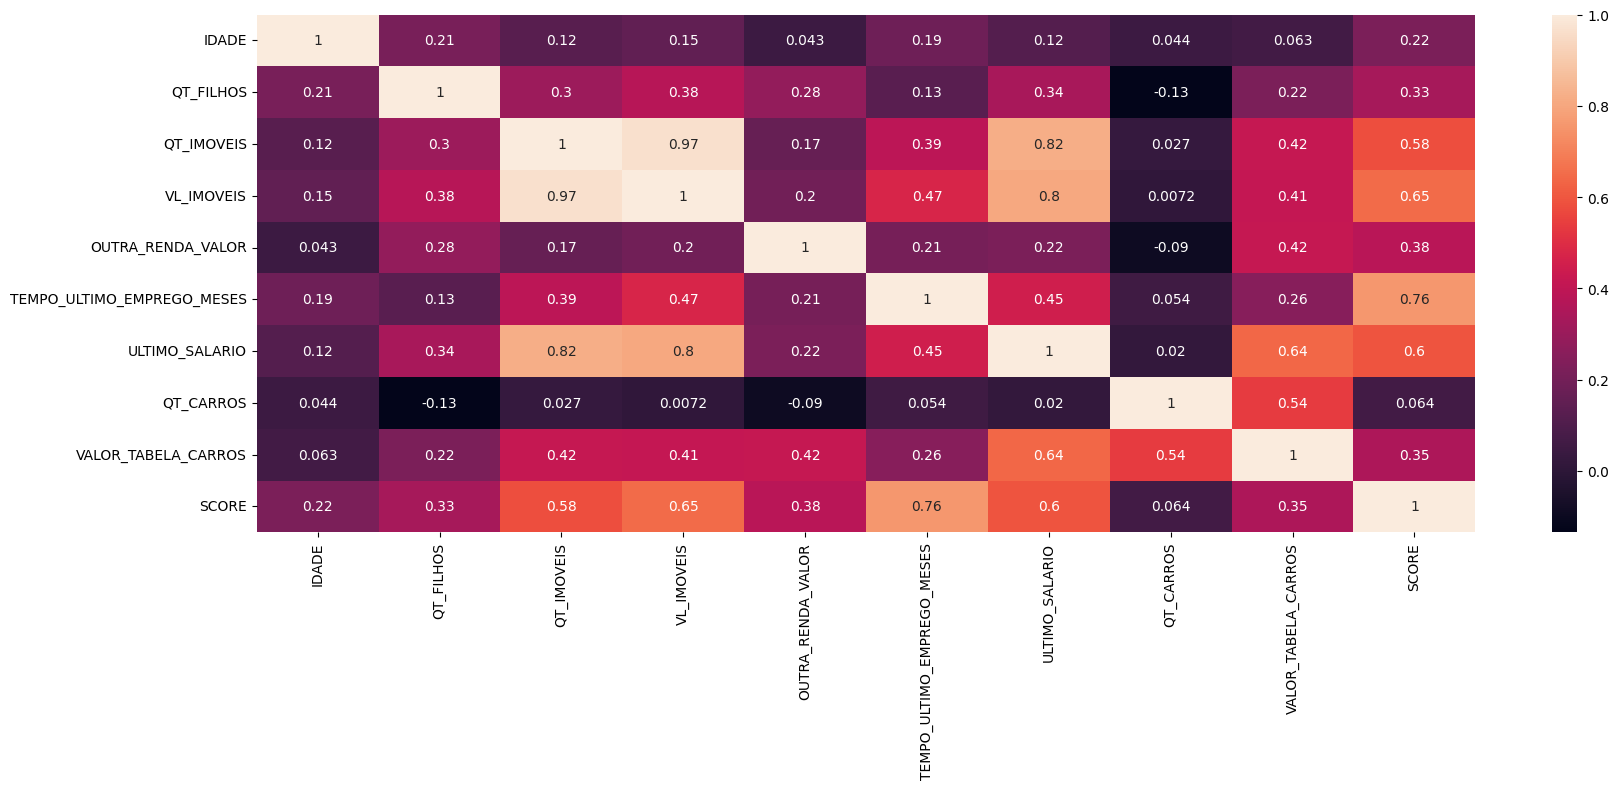

In [25]:
#Analise da correlação entre variáveis
df_num = df[variaveis_numericas]
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(df_num.corr(), annot=True) 

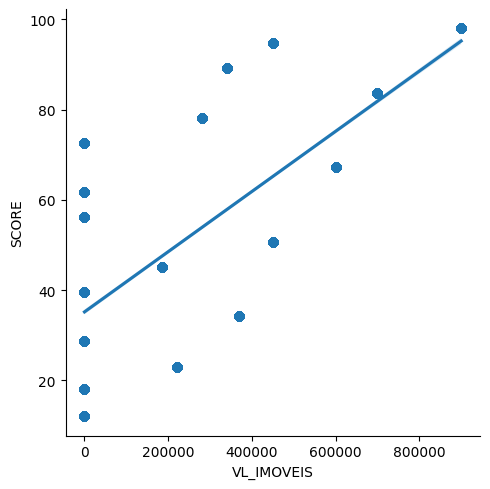

In [26]:
#Analise de disperção de algumas variáveis
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = df_num)

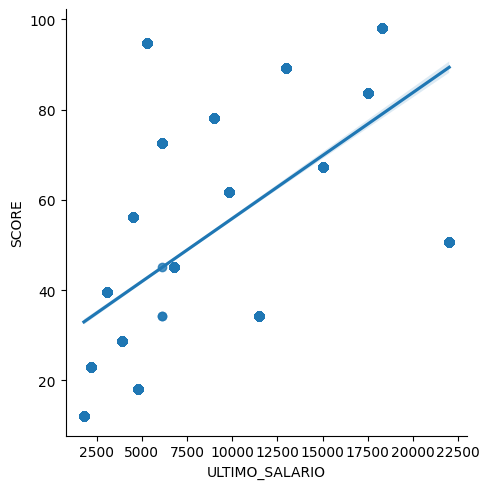

In [27]:
sns.lmplot(x = "ULTIMO_SALARIO", y = "SCORE", data = df_num)

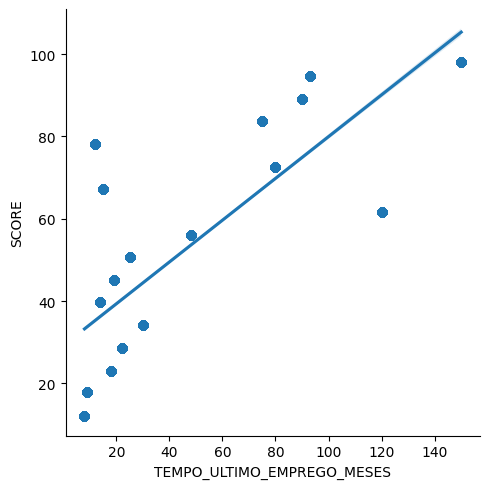

In [28]:
sns.lmplot(x = "TEMPO_ULTIMO_EMPREGO_MESES", y = "SCORE", data = df_num)

In [29]:
# Engenharia de atributos no campo de IDADE e criar um novo campo de Faixa Etaria, primeiro vamos ver os valores maximos e minimos
print('Menor Idade: ', df_num['IDADE'].min())
print('Maior Idade: ', df_num['IDADE'].max())

Menor Idade:  19
Maior Idade:  65


In [30]:
#Criação da nova variável
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"]

df["FAIXA_ETARIA"] = pd.cut(df["IDADE"], idade_bins, labels=idade_categoria)

df["FAIXA_ETARIA"].value_counts()

FAIXA_ETARIA
Até 30          3552
Maior que 50    2448
41 a 50         2070
31 a 40         1270
Name: count, dtype: int64

In [31]:
# Vamos avaliar a média do score pela faixa etaria
df.groupby(["FAIXA_ETARIA"]).mean("SCORE")

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_3684\926154030.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["FAIXA_ETARIA"]).mean("SCORE")


,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
FAIXA_ETARIA,,,,,,,,,,
Até 30,25.429899,0.969595,0.714527,203226.351351,490.540541,35.614865,7328.378378,0.949324,38000.000000,44.762950
31 a 40,33.515748,1.042520,1.044094,261551.181102,1176.377953,37.313386,9650.866142,0.688189,45266.141732,48.883202
41 a 50,45.177778,0.878261,0.766667,220236.714976,436.521739,46.213043,8224.782609,0.964734,35939.130435,51.440177
Maior que 50,53.735294,1.330882,0.889706,243492.647059,680.882353,46.205882,8761.764706,1.058824,49169.117647,56.123775


In [32]:
variaveis_categoricas = []
for i in df.columns[0:48].tolist():
        if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_categoricas.append(i)     

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


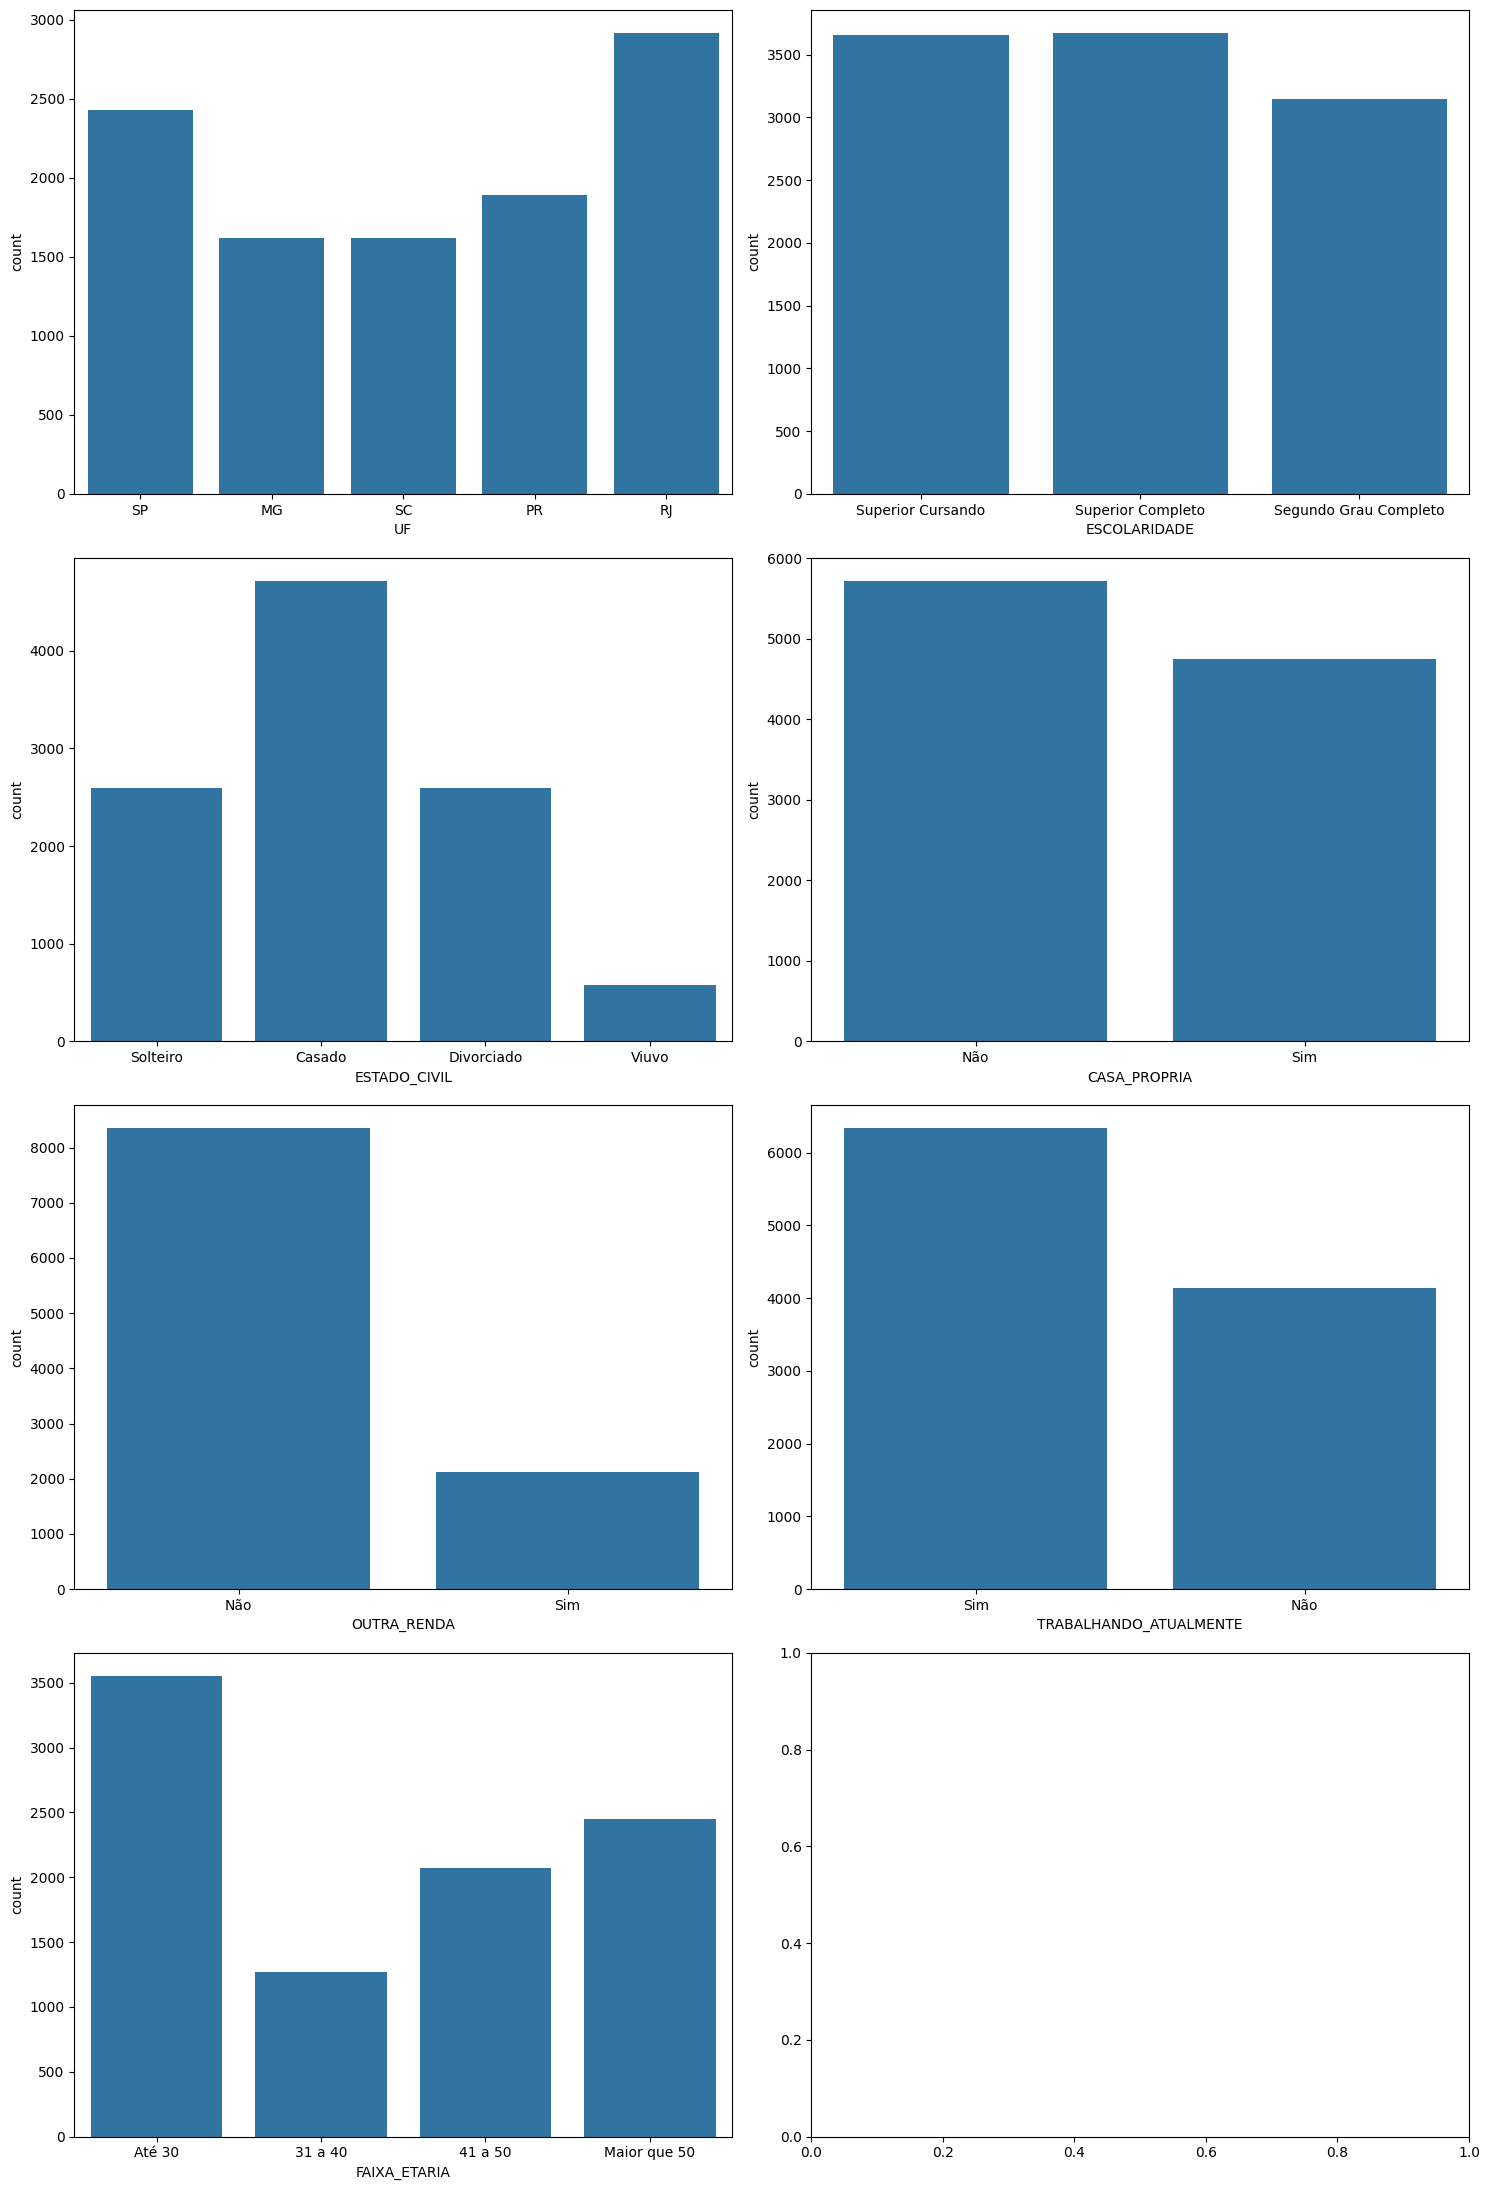

In [33]:
# Analise da distribuição das variaveis do tipo object

plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(4, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:    
    sns.countplot(data = df, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

Pré-processamento Dos Dados

In [34]:
from sklearn.model_selection import train_test_split # Utilizado para separar dados de treino e teste
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo

In [35]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df['FAIXA_ETARIA'] = lb.fit_transform(df['FAIXA_ETARIA'])
df['OUTRA_RENDA'] = lb.fit_transform(df['OUTRA_RENDA'])
df['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df['TRABALHANDO_ATUALMENTE'])
df['ESTADO_CIVIL'] = lb.fit_transform(df['ESTADO_CIVIL'])
df['CASA_PROPRIA'] = lb.fit_transform(df['CASA_PROPRIA'])
df['ESCOLARIDADE'] = lb.fit_transform(df['ESCOLARIDADE'])
df['UF'] = lb.fit_transform(df['UF'])

# Remove valores missing eventualmente gerados
df.dropna(inplace = True)
df.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,2


In [36]:
# Separando a variavel alvo
y = df.iloc[:,15:16]

In [37]:
# Separando as variaveis preditoras

x = df.copy() 

del x['SCORE'] #Excluindo a variavel target, pois já separamos ela na etapa anterior

x.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [38]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [39]:
# Vamos aplicar a normalização em treino e teste
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

In [41]:
# Treina o modelo em regressão linear
modelo = LinearRegression(fit_intercept = True)

modelo = modelo.fit(X_treino_normalizados, y_treino)

In [42]:
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.7984013631162862

In [43]:
#Aplicaremos o xgboost que tende a ser um modelo mais preciso de regressão
from xgboost import XGBRegressor

In [53]:
xgb_model = XGBRegressor(
    n_estimators=100,  # Número de árvores
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=3,  # Profundidade máxima das árvores
    random_state=42  # Para reprodutibilidade
)

xgb_model.fit(X_treino_normalizados, y_treino)

train_pred = xgb_model.predict(X_treino_normalizados)
y_pred = xgb_model.predict(X_teste_normalizados)


In [54]:
r2_score(y_teste, xgb_model.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.9999858736991882

In [75]:
r2_train = r2_score(y_treino, train_pred)
r2_test = r2_score(y_teste, y_pred)

print(f'R^2 no conjunto de treino: {r2_train}')
print(f'R^2 no conjunto de teste: {r2_test}')

R^2 no conjunto de treino: 1.0
R^2 no conjunto de teste: 0.99988853931427


In [ ]:
#Não é uma diferença tão absurda na correlação no treino e no teste, podemos descartar overfitting

In [76]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_treino, train_pred)
mae_test = mean_absolute_error(y_teste, y_pred)

print(f'MAE no conjunto de treino: {mae_train}')
print(f'MAE no conjunto de teste: {mae_test}')

MAE no conjunto de treino: 0.0017469486920163035
MAE no conjunto de teste: 0.006953118834644556


In [78]:
UF = 2
IDADE = 42 
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 300000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000 
TEMPO_ULTIMO_EMPREGO_MESES = 18 
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 5400.0
QT_CARROS = 4
VALOR_TABELA_CARROS = 70000
FAIXA_ETARIA = 3

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]


# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

# Previsão
print("Score de crédito previsto para esse cliente:", xgb_model.predict(X))

Score de crédito previsto para esse cliente: [30.908232]


c:\Users\Guilherme\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
